## k-fold crossvalidation

Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

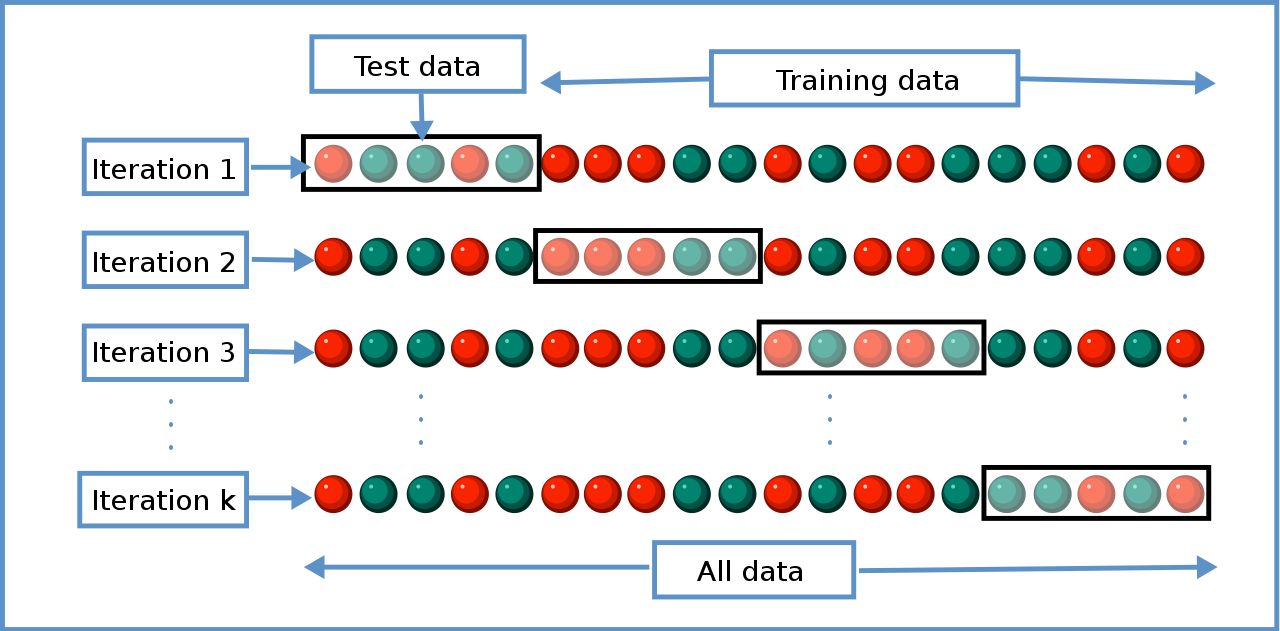

### Problem definition

* Build 2 Linear model namely simple and complex. complex model having more dependent variables compared simple model.
* These models makes use of posterior probabilities to make predictions.
* Test these models using K-cross validation and compute mean error for both models.

### Posterior Probability

Posterior probability is the probability an event will happen after all evidence or background information has been taken into account. It is closely related to prior probability, which is the probability an event will happen before you taken any new evidence into account. 

In [1]:
import pandas as pd
import numpy as np

#### Simple Model   

In [2]:
def model_1(train_data,test_data):
    a = 0.5
    b1 = 0.4
    sigma = 0.4
    
    # train data
    X1 = train_data['X1']
    
    # test data
    Xt = test_data['X1']
    Yt = test_data['Y']

    # Linear model
    mu = a + b1*X1
  
    Y = np.random.normal(mu,sigma,len(train_data))

    # making use of complete posterior
    Ypred1 = []
    for x in Xt:
        predictions = []
        for y in Y:
            predictions.append(y + y * x)
        # mean of predictions
        Ypred1.append(sum(predictions)/len(predictions))
    
    error = sum(pow(Ypred1-Yt,2))
    return error


#### complex model

In [3]:
def model_2(train_data,test_data):
    a = 0.5
    b1 = 0.4
    sigma = 0.4
    b2 = 0.2
    
    # train data
    X1 = train_data['X1']
    X2 = train_data['X2']
    
    # test data
    Xt1 = test_data['X1']
    Xt2 = test_data['X2']
    Yt = test_data['Y']

    # Linear model
    mu = a + b1*X1 + b2*X2
  
    Y = np.random.normal(mu,sigma,len(train_data))

    # making use of complete posterior
    Ypred1 = []
    
    for xt1,xt2 in zip(Xt1,Xt2):
        predictions = []
        for y in Y:
            predictions.append(y + y * xt1 + y * xt2)
        # mean of predictions
        Ypred1.append(sum(predictions)/len(predictions))
    
    error = sum(pow(Ypred1-Yt,2))
    return error

#### Building K-cross validation code from scratch 

In [4]:
def main():
    simpledf = pd.read_csv('./simple.csv')
    complexdf = pd.read_csv('./complex.csv')

    K_fold = 5 #k value

    set_length = int(len(simpledf)/K_fold)
    test_index = 0
    simpleErrors = []
    complexErrors = []

    # k iterations
    for k in range(0,K_fold):
        # splitting datasets
        simpleTrain1 = simpledf.iloc[:test_index]
        simpleTest = simpledf.iloc[test_index:test_index+set_length]
        simpleTrain2 = simpledf.iloc[test_index+set_length:]
    
        complexTrain1 = complexdf.iloc[:test_index]
        complexTest = complexdf.iloc[test_index:test_index+set_length]
        complexTrain2 = complexdf.iloc[test_index+set_length:]
    
        # concat the training frames
        frames = [simpleTrain1,simpleTrain2]
        simpleTrain = pd.concat(frames)
    
        frames = [complexTrain1,complexTrain2]
        complexTrain = pd.concat(frames)

        # Test set index counter
        test_index+=set_length

        # Error computation
        simpleErrors.append(model_1(simpleTrain,simpleTest))
        complexErrors.append(model_2(complexTrain,complexTest))

    print("K-cross validation avg error for simple set :",sum(simpleErrors)/len(simpleErrors))
    print("K-cross validation avg error for complex set :",sum(complexErrors)/len(complexErrors))


In [5]:
if __name__ == "__main__":
    main()

K-cross validation avg error for simple set : 7.520503333929293
K-cross validation avg error for complex set : 9.150826551966574
